# Part I - Exploratory Analytics: Data related job salaries

The salaries dataset we will work with is from ai-jobs. Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis. The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

The dataset contains one table structured as follow:

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year with the following possible values:
EN: Entry-level / Junior
MI: Mid-level / Intermediate
SE: Senior-level / Expert
EX: Executive-level / Director

employment_type: The type of employement for the role:
PT: Part-time
FT: Full-time
CT: Contract
FL: Freelance

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely, possible values are as follows:
0: No remote work (less than 20%)
50: Partially remote
100: Fully remote (more than 80%)

company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size: The average number of people that worked for the company during the year:
S: less than 50 employees (small)
M: 50 to 250 employees (medium)
L: more than 250 employees (large)

# Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
salaries_df = pd.read_csv("salaries.csv")
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


In [4]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


In [5]:
salaries_df.shape

(1332, 11)

# Main objective
The primary goal of the data is to provide better guidance in regards to what's being paid globally. We are interested in finding which factors accounts for higher salaries and salary trends within the years.

In [6]:
#checking for duplicates
salaries_df.duplicated().value_counts()

False    1069
True      263
dtype: int64

In [7]:
duplicates = salaries_df[salaries_df.duplicated()]
print(salaries_df.work_year.value_counts())
duplicates.work_year.value_counts()

2022    1029
2021     228
2020      75
Name: work_year, dtype: int64


2022    260
2021      2
2020      1
Name: work_year, dtype: int64

In [8]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.000000,1.332000e+03,1332.000000,1332.000000
mean,2021.716216,2.377124e+05,123374.658408,63.851351
std,0.562228,1.077369e+06,65945.872172,45.263587
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.000000e+04,75593.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.751000e+05,164997.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


# Cleaning

In [9]:
salaries_clean = salaries_df.copy()

In [10]:
# Function to convert datatype to categorical (ordinal and nominal)
def to_category(var: str, ordered: bool, df: pd.DataFrame, categories: list):
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        classes = pd.api.types.CategoricalDtype(ordered = ordered, categories = categories)
        df[var] = df[var].astype(classes)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = ordered,categories = categories)
    return df[var]

In [11]:
# Create category type
experience = ['EN', 'MI', 'SE', 'EX']
company = ['S', 'M', 'L']
employment_type = ['PT', 'FT', 'CT', 'FL']
remote = [0, 50, 100]
year = [2020, 2021, 2022]

salaries_clean['experience_level'] = to_category('experience_level', True, salaries_clean, experience)
salaries_clean['company_size'] = to_category('company_size', True, salaries_clean, company)
salaries_clean['employment_type'] = to_category('employment_type', False, salaries_clean, employment_type)
salaries_clean['remote_ratio'] = to_category('remote_ratio', True, salaries_clean, remote)
salaries_clean['work_year'] = to_category('work_year', True, salaries_clean, year)

# Test types were converted. Dtype should be category
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           1332 non-null   category
 1   experience_level    1332 non-null   category
 2   employment_type     1332 non-null   category
 3   job_title           1332 non-null   object  
 4   salary              1332 non-null   int64   
 5   salary_currency     1332 non-null   object  
 6   salary_in_usd       1332 non-null   int64   
 7   employee_residence  1332 non-null   object  
 8   remote_ratio        1332 non-null   category
 9   company_location    1332 non-null   object  
 10  company_size        1332 non-null   category
dtypes: category(5), int64(2), object(4)
memory usage: 69.9+ KB


In [12]:
# Delete duplicates and reset index
salaries_clean.drop_duplicates(inplace= True, ignore_index=True)

In [13]:
# Test duplicates were deleted. result should be 0
salaries_clean.duplicated().sum()

0

In [14]:
salaries_clean.shape

(1069, 11)

In [15]:
# Save the cleaned data in a csv file
salaries_clean.to_csv('salaries_master.csv', index=False)

# Visualisation

Univariate Exploration

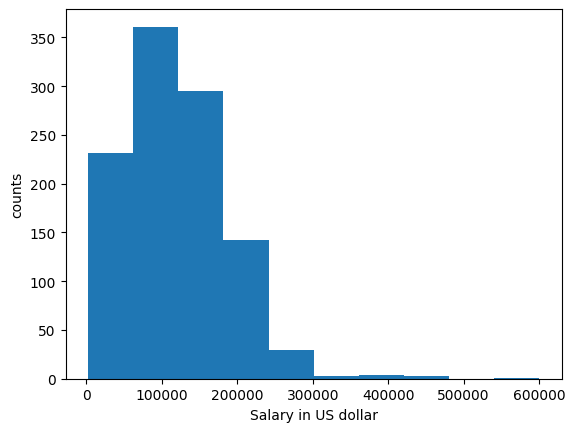

In [16]:
#number of data scientists getting what kind of salary
plt.hist(data=salaries_clean, x='salary_in_usd')
plt.xlabel('Salary in US dollar')
plt.ylabel('counts')
plt.show()

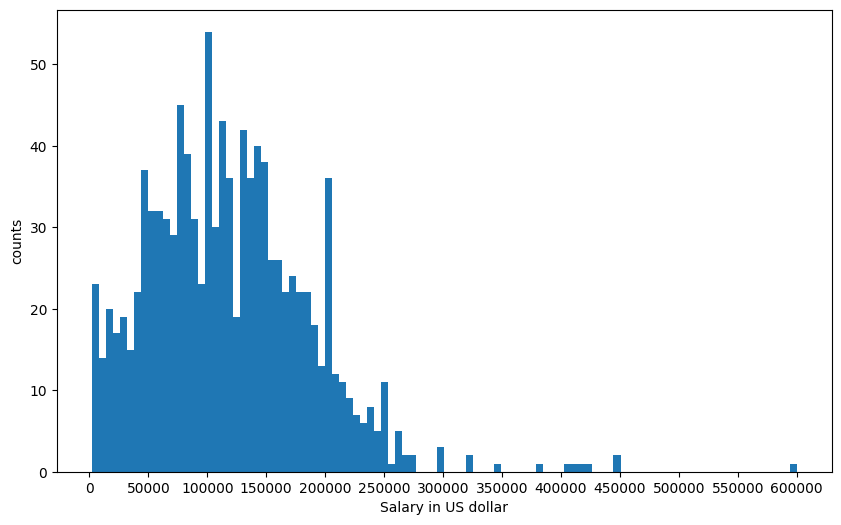

In [17]:
plt.figure(figsize = [10, 6])
xticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
plt.hist(data=salaries_clean, x='salary_in_usd', bins = 100)
plt.xticks(xticks)
plt.xlabel('Salary in US dollar')
plt.ylabel('counts');

In [18]:
# collect rows with salaries on the right of the graph
discontinous_salaries = salaries_clean[salaries_clean.salary_in_usd > 275000]
print(discontinous_salaries.shape)
discontinous_salaries.sort_values(by='salary_in_usd', ascending=False)

(15, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1016,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
832,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
889,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
1061,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
987,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
1064,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
773,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
778,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
112,2022,SE,FT,Data Architect,345600,USD,345600,US,0,US,M
1010,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L


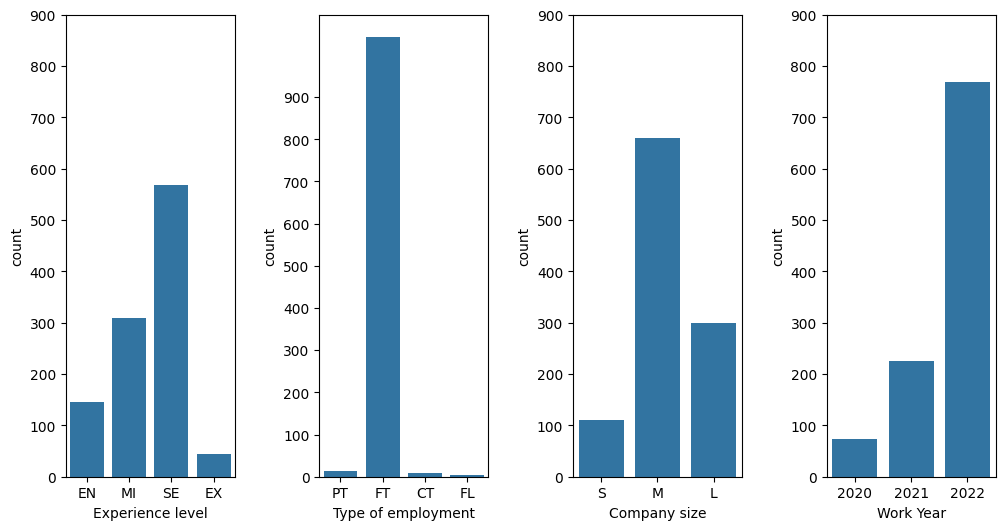

In [19]:
# Bar plots to study the exp level, employment type, company size of the respondent

fig, ax = plt.subplots(ncols=4, figsize = [12,6])
yticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
default_color = sb.color_palette()[0]
sb.countplot(data = salaries_clean, x = 'experience_level', color = default_color, ax = ax[0]).set(xlabel='Experience level')
ax[0].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'employment_type', color = default_color, ax = ax[1]).set(xlabel='Type of employment')
ax[1].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'company_size', color = default_color, ax = ax[2]).set(xlabel='Company size')
ax[2].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'work_year', color = default_color, ax = ax[3]).set(xlabel='Work Year')
ax[3].set_yticks(yticks)
plt.subplots_adjust(wspace=0.5)
plt.show()

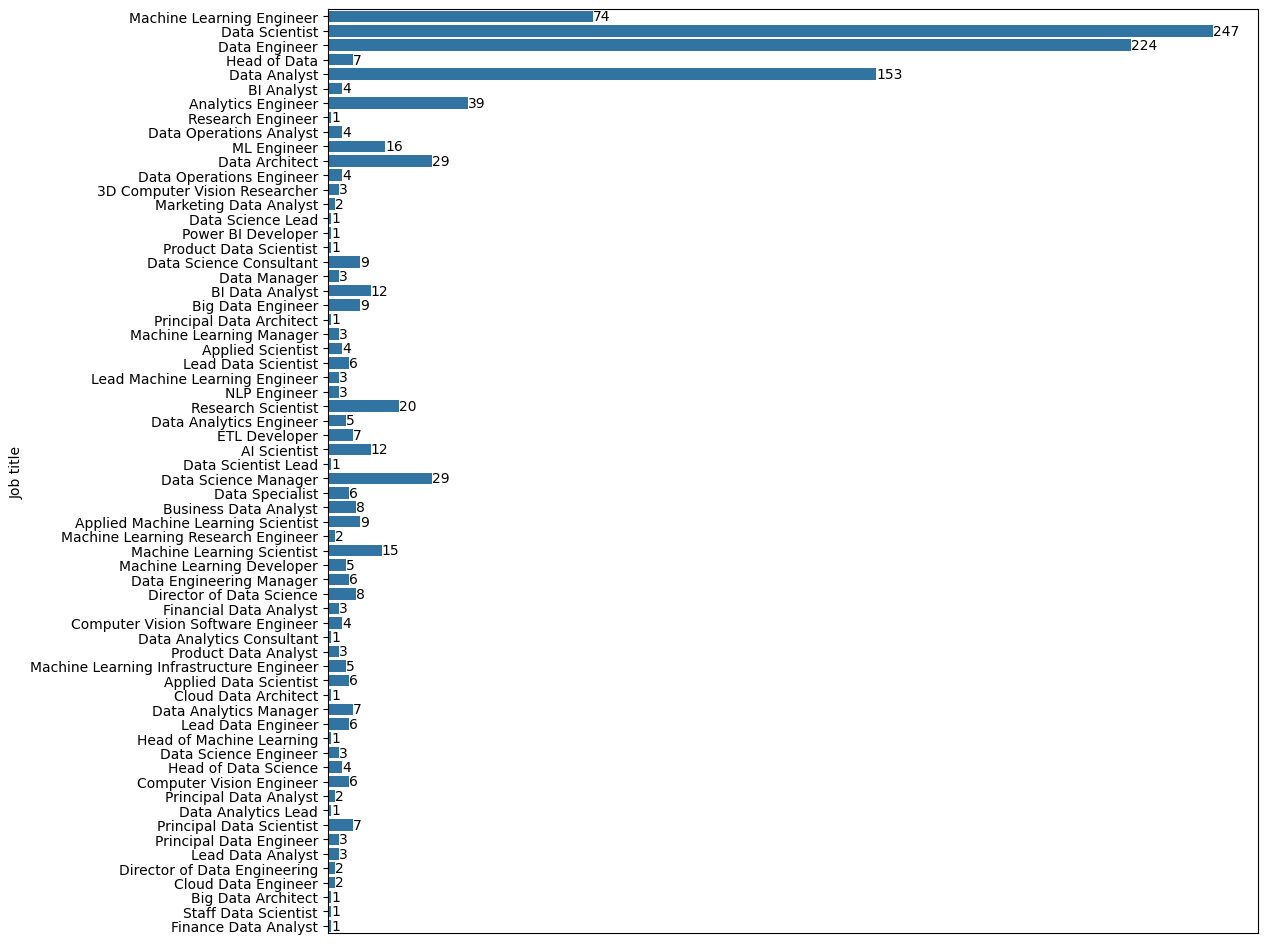

In [20]:
#Dist of job title

plt.figure(figsize=[12,12])
ax_job = sb.countplot(data=salaries_clean,color=default_color, y='job_title')
ax_job.axes.get_xaxis().set_visible(False)
ax_job.bar_label(ax_job.containers[0])
plt.ylabel('Job title')
plt.show()

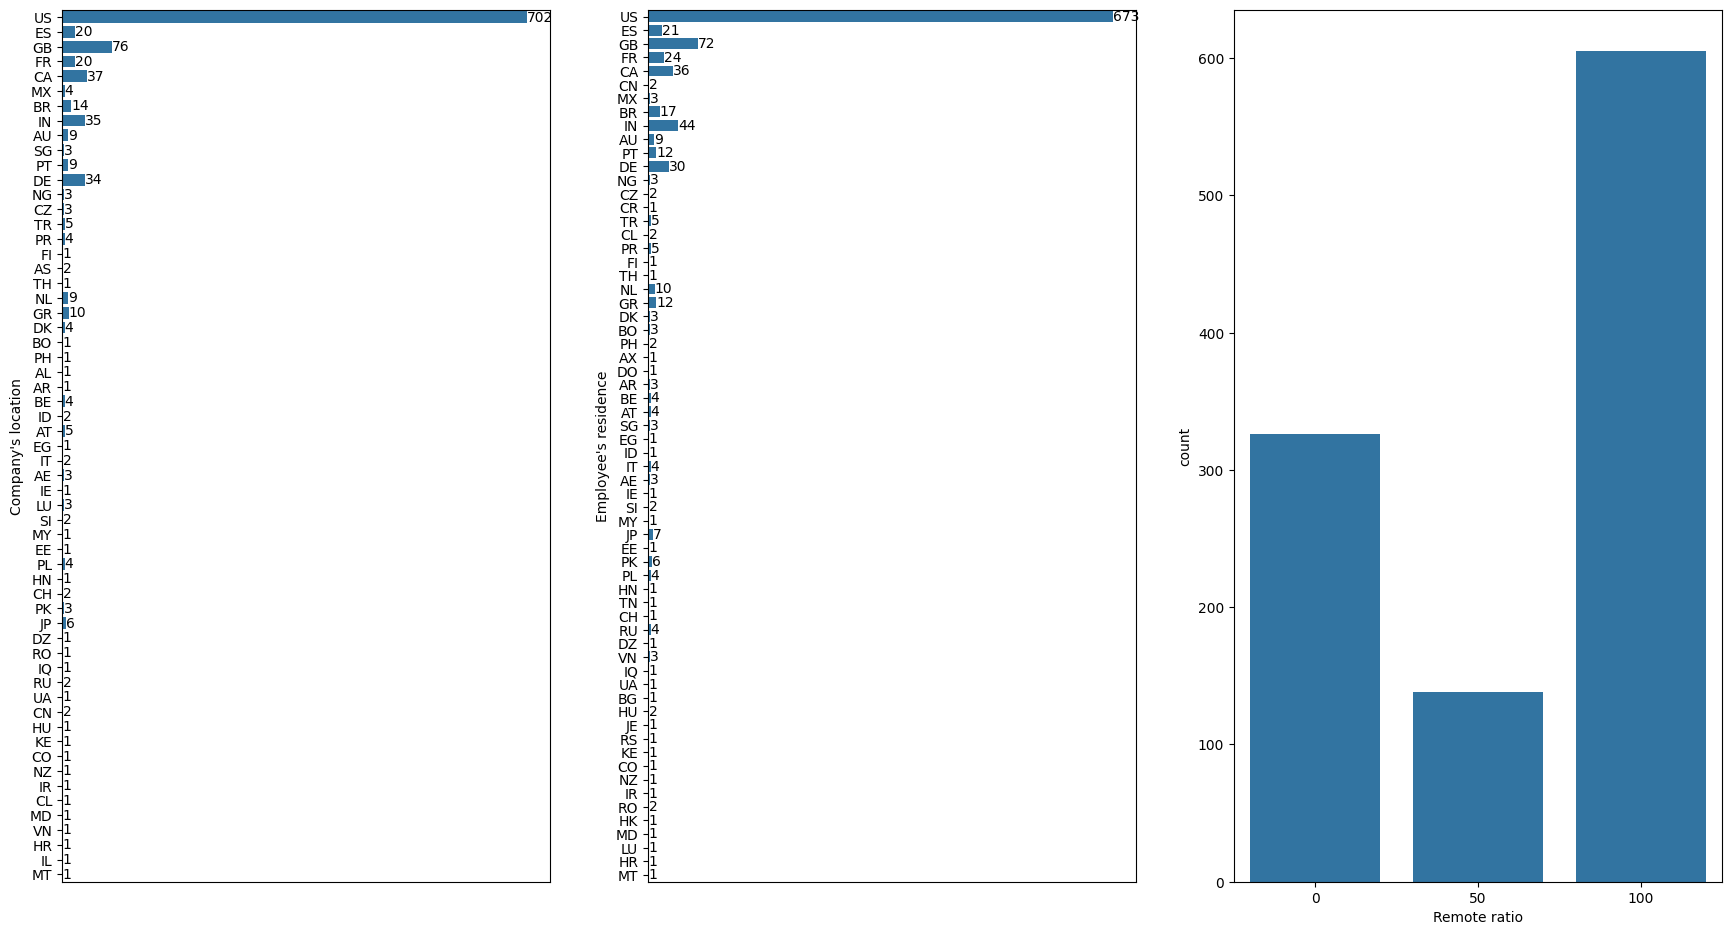

In [21]:
#Dist of company location, employee residence, remote ration

fig, ax = plt.subplots(ncols=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = salaries_clean, y = 'company_location', color = default_color, ax = ax[0]).set(ylabel="Company's location")
ax[0].axes.get_xaxis().set_visible(False)
ax[0].bar_label(ax[0].containers[0])
sb.countplot(data = salaries_clean, y = 'employee_residence', color = default_color, ax = ax[1]).set(
    ylabel="Employee's residence")
ax[1].axes.get_xaxis().set_visible(False)
ax[1].bar_label(ax[1].containers[0])
sb.countplot(data = salaries_clean, x = 'remote_ratio', color = default_color, ax = ax[2]).set(xlabel='Remote ratio')
plt.subplots_adjust(right=2.2, top=1.2)
plt.show()

# correlation between salary and categorical variables

In [22]:
# List of categorical variable
lim_categoric_vars = ['work_year', 'experience_level', 'company_size', 'employment_type', 'remote_ratio']
categoric_vars = ['company_location', 'employee_residence', 'job_title']

In [23]:
def boxgrid(x, y, **kwargs):
    """ Creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

<Figure size 1000x1000 with 0 Axes>

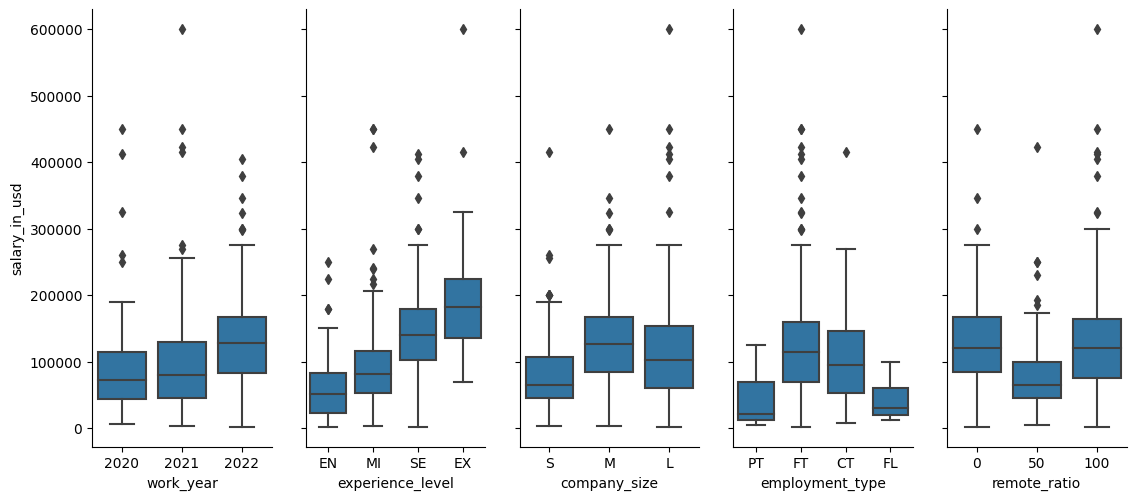

In [24]:
# plot matrix of salary in US dollar against categorical features.
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = salaries_clean, y_vars = ['salary_in_usd'], x_vars = lim_categoric_vars, aspect = 1)
g.map(boxgrid)
g.fig.set_size_inches(8,6)
plt.subplots_adjust(right=1.35)
plt.show();

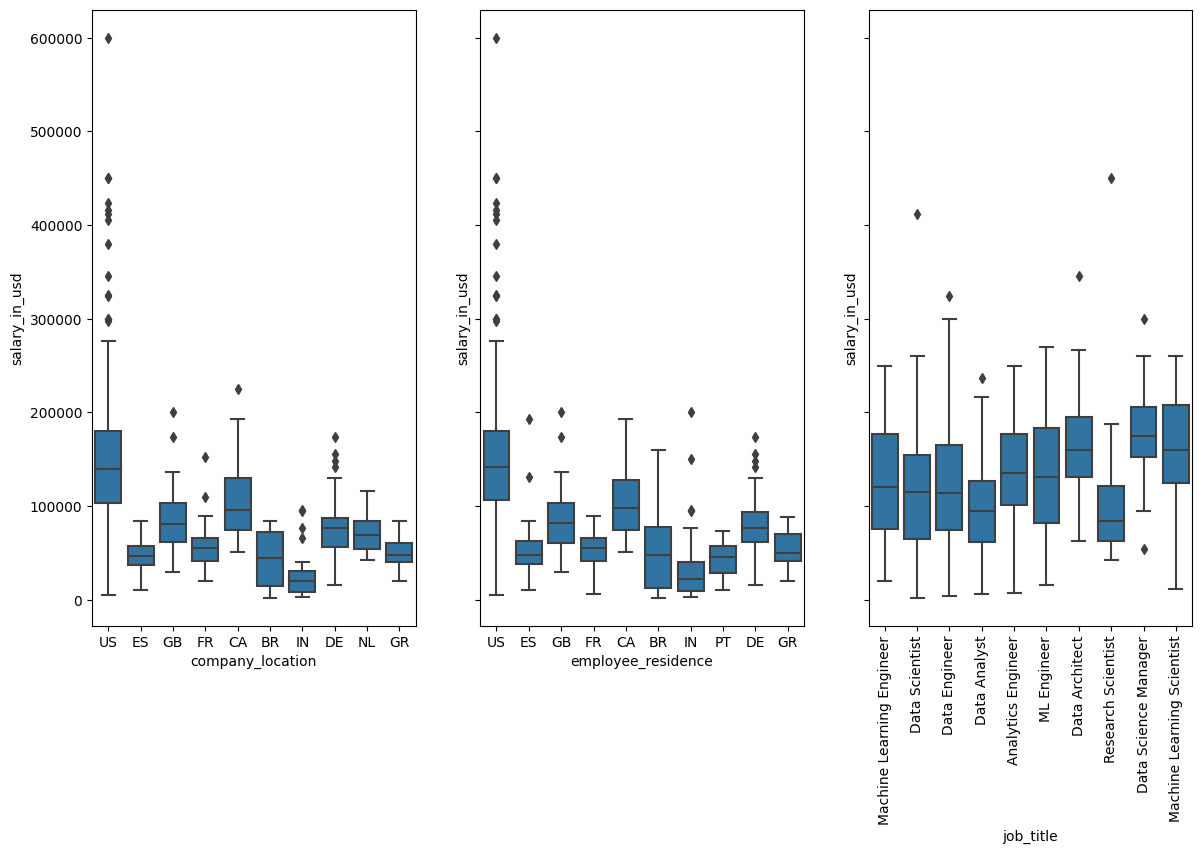

In [25]:
fig, ax = plt.subplots(ncols=3, figsize = [8,8], sharey=True)
count = 0
# loop through qualittive values with too many values to select top 10 and plot a box plot
for var in categoric_vars:
    z = salaries_clean[var].value_counts().head(10)
    #print(salaries_clean[salaries_clean[var].apply(lambda x: x in z.index)])
    sb.boxplot(data = salaries_clean[salaries_clean[var].apply(lambda x: x in z.index)], color = default_color,
               x = var, y = "salary_in_usd", ax = ax[count])
    count+= 1

ax[count-1].tick_params(axis='x', rotation=90)
plt.subplots_adjust(right=1.5)

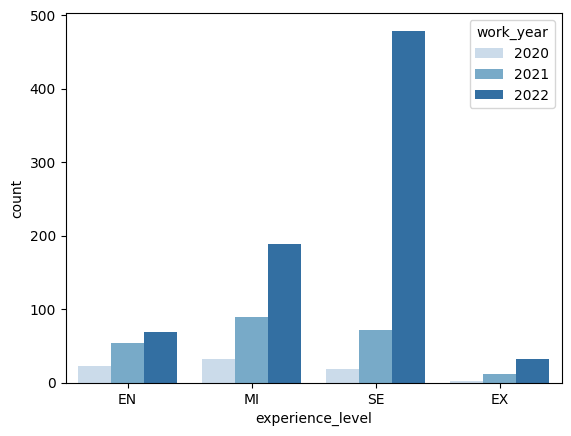

In [26]:
# since there's only three subplots to create, using the full data should be fine.
#plt.figure(figsize = [8,8])
# work year vs experience level with reference to salaries
sb.countplot(data = salaries_clean, x = 'experience_level', hue = 'work_year', palette = 'Blues')
plt.show()

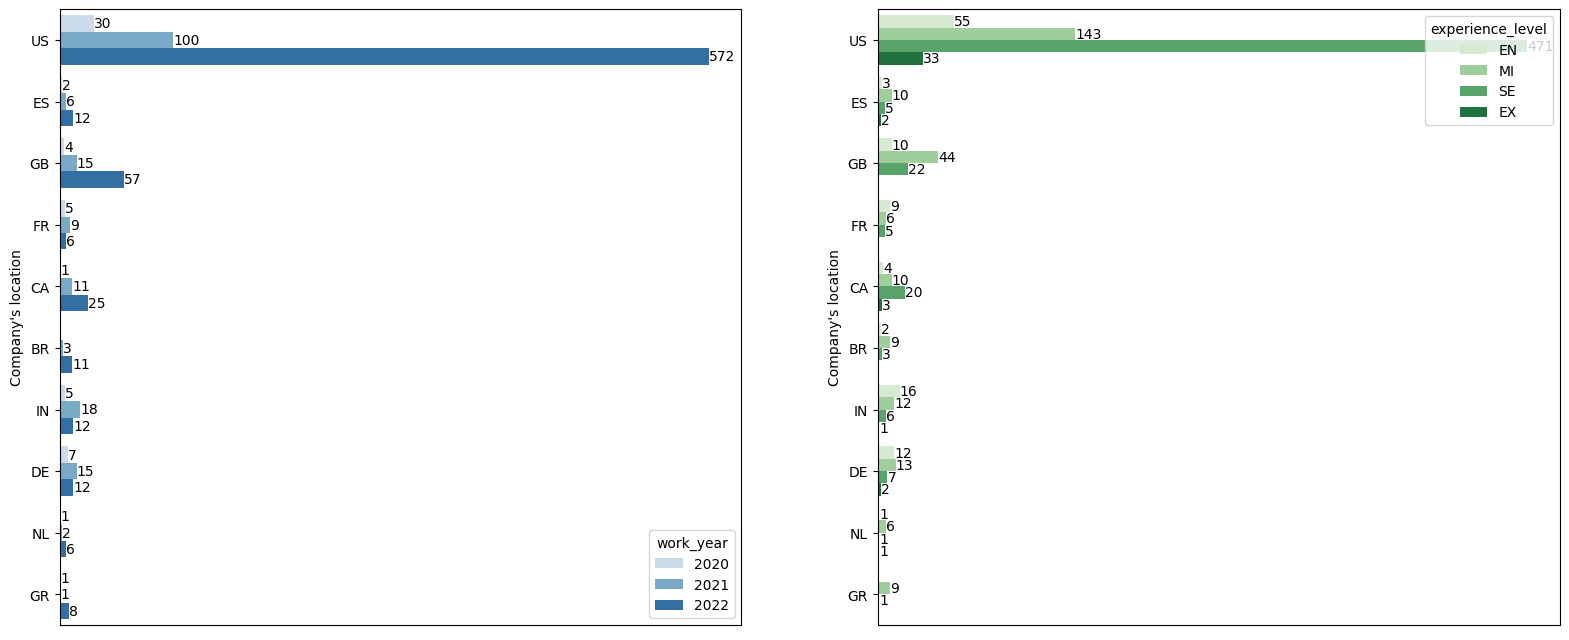

In [27]:
# Take top 10 company locations
z = salaries_clean['company_location'].value_counts().head(10)
company_10 = salaries_clean[salaries_clean['company_location'].apply(lambda x: x in z.index)]
fig, ax = plt.subplots(ncols=2, figsize = [8,8])

# subplot 1: company location vs work year
sb.countplot(data = company_10, y = 'company_location', hue = 'work_year', palette = 'Blues',
             ax = ax[0]).set(ylabel="Company's location")
ax[0].axes.get_xaxis().set_visible(False)
for x in range(len(ax[0].containers)):
    ax[0].bar_label(ax[0].containers[x])

# subplot 2: company location vs experience level
sb.countplot(data = company_10, y = 'company_location', hue = 'experience_level', palette = 'Greens',
             ax = ax[1]).set(ylabel="Company's location")
ax[1].axes.get_xaxis().set_visible(False)

for x in range(len(ax[1].containers)):
    ax[1].bar_label(ax[1].containers[x])
    
plt.subplots_adjust(right=2)


plt.show()

Relationship between salary, experience and work year

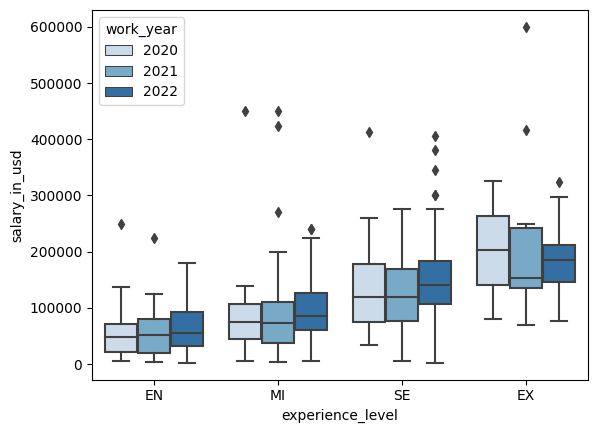

In [28]:
# plot matrix of salary in US dollar against categorical features.
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues')
plt.show();

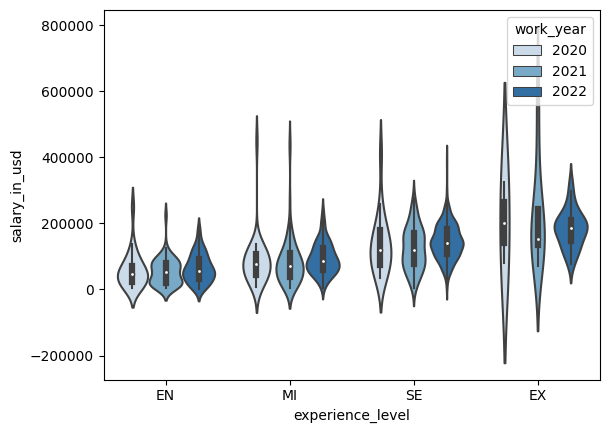

In [29]:
# plot matrix of salary in US dollar against categorical features.
sb.violinplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues')
plt.show();

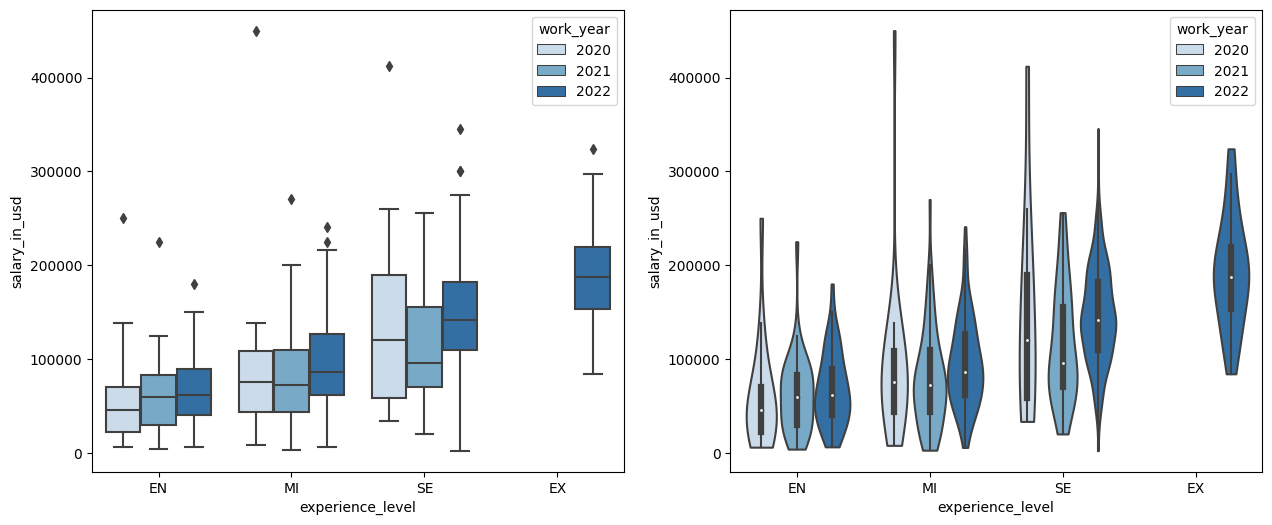

In [30]:
#Lets consider the top 10 jobs to reduce the noise in the plots as the top 10 make up 79% of the cleaned data

z = salaries_clean['job_title'].value_counts().head(10)
job_10 = salaries_clean[salaries_clean['job_title'].apply(lambda x: x in z.index)]


fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.subplots_adjust(right=1.1)
plt.show();

In [31]:
#executive positions

Ex_exp = job_10[job_10['experience_level'].str.contains('EX')]
Ex_exp.job_title.value_counts()

Data Engineer                 8
Analytics Engineer            6
Data Science Manager          4
Machine Learning Scientist    2
Data Analyst                  2
Research Scientist            1
Name: job_title, dtype: int64

# Distribution of salaries

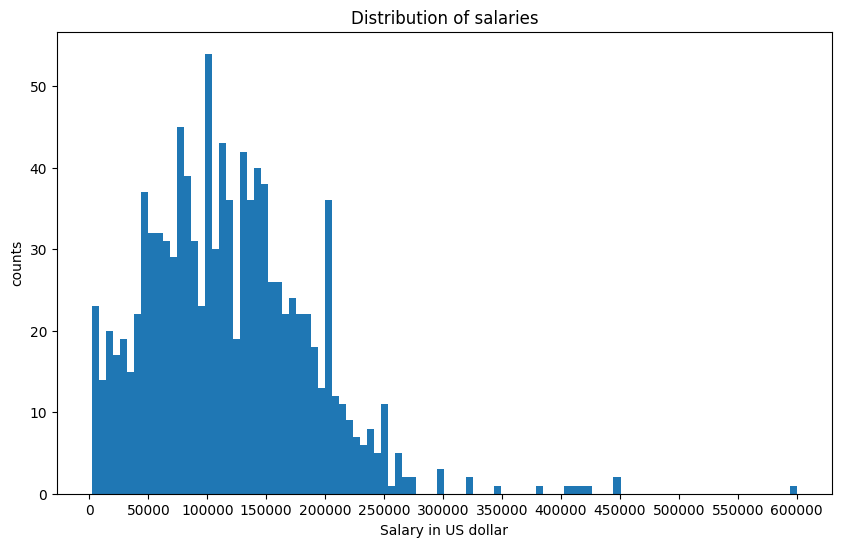

In [32]:
plt.figure(figsize = [10, 6])
xticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
plt.hist(data=salaries_clean, x='salary_in_usd', bins = 100)
plt.xticks(xticks)
plt.yticks([0, 10, 20, 30, 40, 50])
plt.title('Distribution of salaries')
plt.xlabel('Salary in US dollar')
plt.ylabel('counts');

# Salary vs Experience level

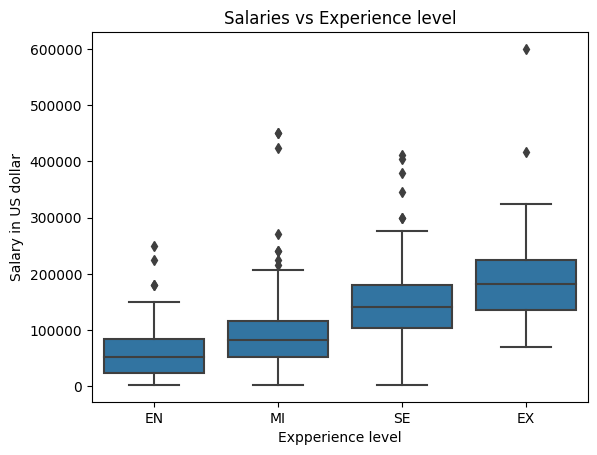

In [33]:
blue_color = sb.color_palette()[0]
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', color=blue_color)
plt.title('Salaries vs Experience level')
plt.ylabel('Salary in US dollar')
plt.xlabel('Expperience level');
plt.show();

# Salary vs Work year

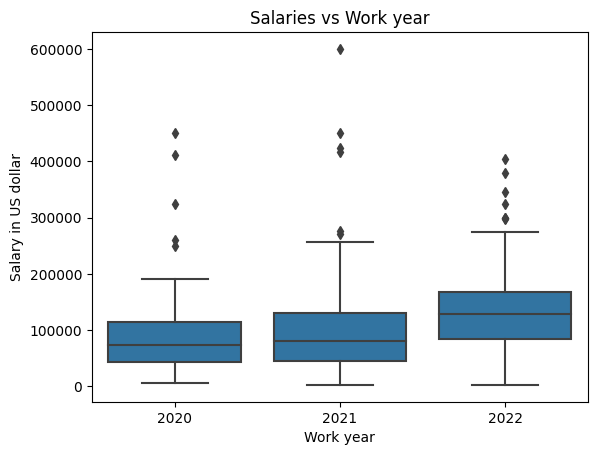

In [35]:
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'work_year', color=blue_color)
plt.title('Salaries vs Work year')
plt.ylabel('Salary in US dollar')
plt.xlabel('Work year');
plt.show()

# Salary by experience level and work year

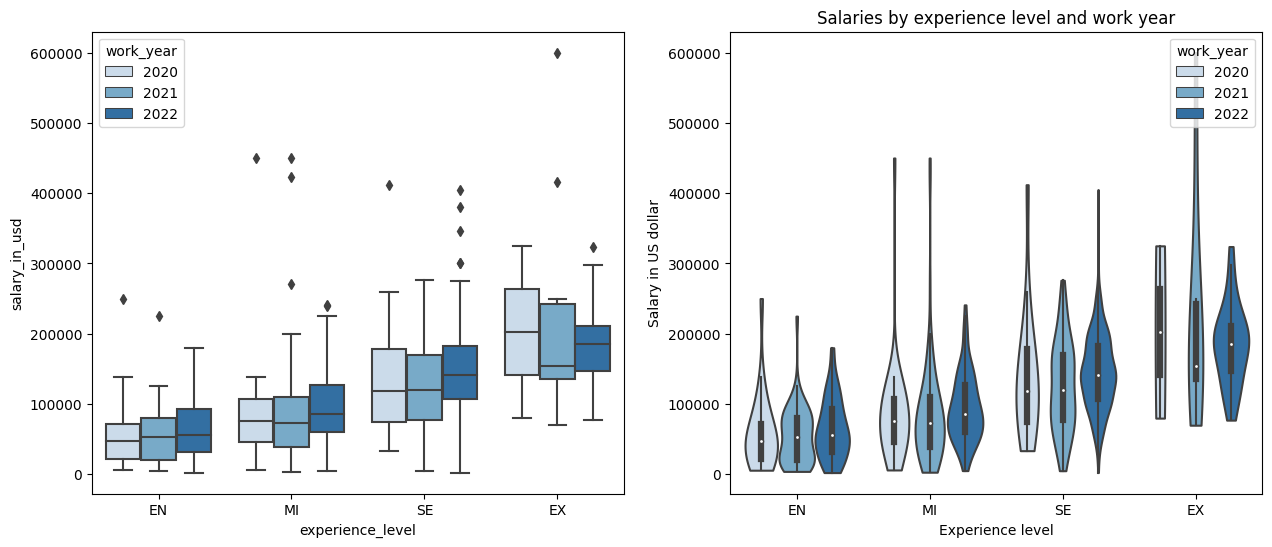

In [36]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.title('Salaries by experience level and work year')
plt.ylabel('Salary in US dollar')
plt.xlabel('Experience level');
plt.subplots_adjust(right=1.1)
plt.show();

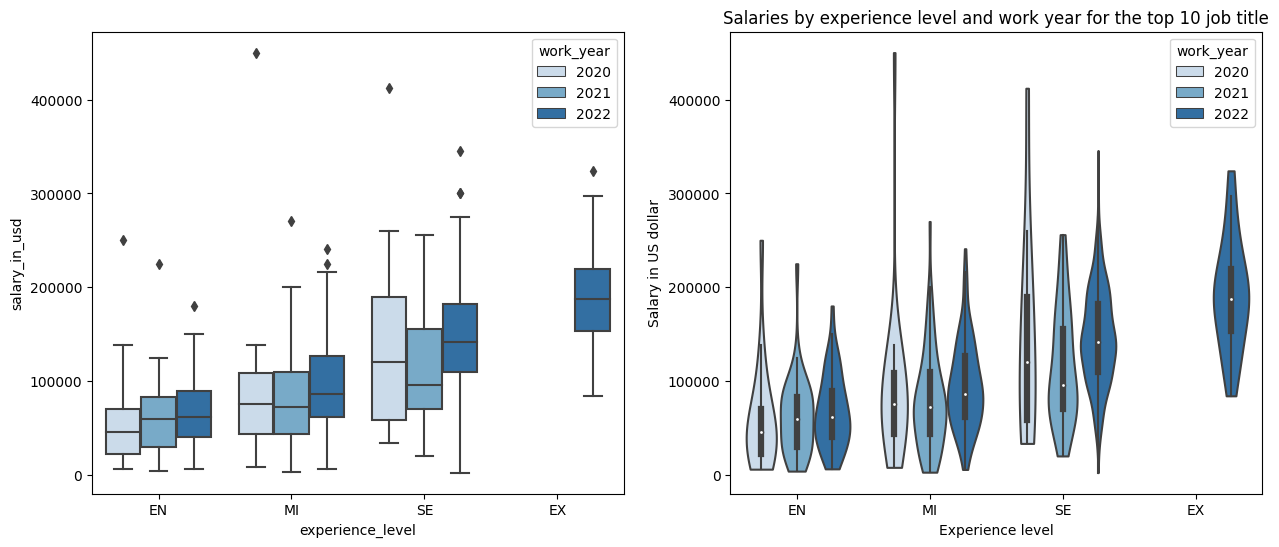

In [37]:
z = salaries_clean['job_title'].value_counts().head(10)
job_10 = salaries_clean[salaries_clean['job_title'].apply(lambda x: x in z.index)]


fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.title('Salaries by experience level and work year for the top 10 job title')
plt.ylabel('Salary in US dollar')
plt.xlabel('Experience level');
plt.subplots_adjust(right=1.1)
plt.show();